In [1]:
]config DYALOG_NETCORE

┌──────────────┬─┐
│DYALOG_NETCORE│1│
└──────────────┴─┘

In [2]:
]LINK.create vega C:\Users\kimmo\OneDrive\dyalog\vega
2⎕fix 'file://c:/Users/kimmo/rsconnect/rserve.dyalog'
r←⎕new RS.Rserve

Linked: #.vega ←→ C:\Users\kimmo\OneDrive\dyalog\vega

In [3]:
0 r.eval 'library(data.table)'

In [4]:
r.eval 'library(DBI)'

┌───┬──────────┬─────┬────────┬─────────┬─────┬────────┬───────┬────┐
│DBI│data.table│stats│graphics│grDevices│utils│datasets│methods│base│
└───┴──────────┴─────┴────────┴─────────┴─────┴────────┴───────┴────┘

In [5]:
0 r.eval 'con = dbConnect(duckdb::duckdb(), dbdir=":memory:", read_only=FALSE)'

In [6]:
0 r.eval 'cobasket<-fread("c:/users/kimmo/Onedrive/salary/cobasket.csv")' 
0 r.eval 'positions<-fread("c:/users/kimmo/Onedrive/salary/positions.csv")'
0 r.eval 'coeff<-fread("c:/users/kimmo/Onedrive/salary/coefficients.csv")'
0 r.eval 'cobasket<-cobasket[positions,on=.(Pos=Pos),nomatch=0]'
0 r.eval 'cobasket<-cobasket[coeff,on=.(Pos=Pos),nomatch=0]'
0 r.eval 'setorder(cobasket,PosTra)'
0 r.eval 'dbWriteTable(con, "cobasket", cobasket)'

In [28]:
data←r.eval 'cobasket[Period<201810,.(BH=sum(Block),Pro=sum(Prorated),.N),by=.(Pos,Id)][positions,on=.(Pos=Pos),nomatch=0][(N==12&Pro<60),.(PosTra,BH)]'

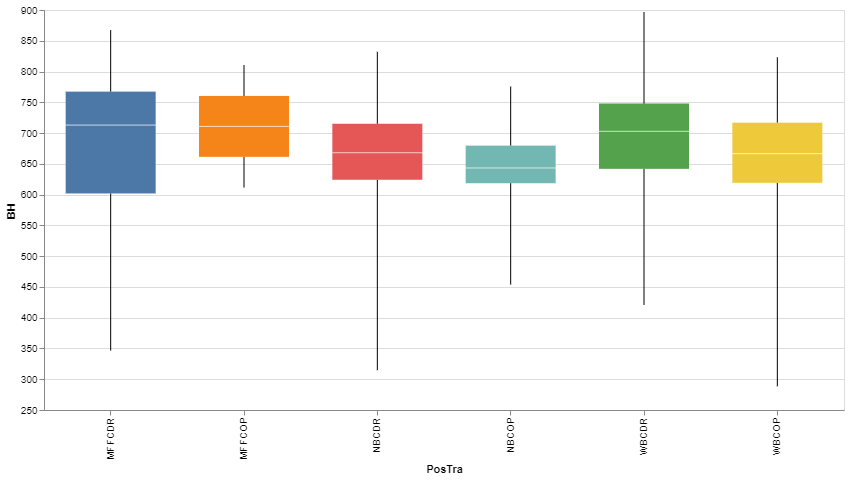

In [29]:
:vega-lite
('PosTra' 'BH')vega.boxplot data.attributes[⊂'names']vega.json_data↓⍉↑data.data

In [30]:
data←r.eval 'cobasket[Period<201810,.(BH=sum(Block),Pro=sum(Prorated),.N),by=.(Pos,Id)][positions,on=.(Pos=Pos),nomatch=0][(N==12),.(PosTra,BH)]'

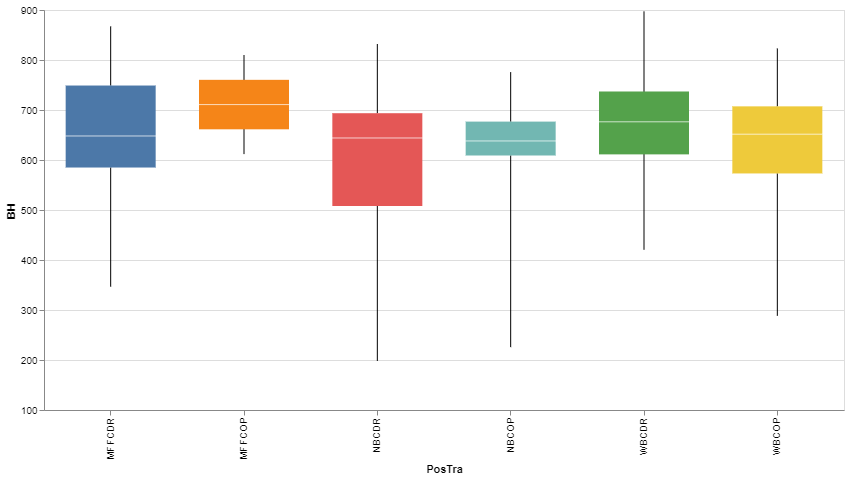

In [31]:
:vega-lite
('PosTra' 'BH')vega.boxplot data.attributes[⊂'names']vega.json_data↓⍉↑data.data